# Quizz 1: Seminario de Modelización Matemática y Datos

## Importe y Primera observación de los datos

Este problema es parte de una actividad realizada en el Seminario de Ingeniería Industrial II de la Facultad de Ingeniería de la Facultad de Buenos Aires llamado "Taller de Modelización Matemática y Datos". Para esto se utilizan bases de datos *ficticios*.

El caso consiste en observaciones de actividades con bienes materiales, realizadas por personas en una ciudad. En estas observaciones se consideran las siguientes variables (explicativas):

Date = Fecha y hora en la que fue realizada la actividad\
Ammount = Valor monetario de los bienes materiales que la persona poseía durante la actividad\
LONG = longitud cardinal en la que se encontraba la persona durante la actividad\
LAT = latitud cardinal en la que se encontraba la persona durante la actividad\
f1 = característica 1 del bien material, categórica\
f2 = característica 2 del bien material, categórica

Y por último la principal variable de interés (de respuesta) será:

Target = Si sucedió el *robo* del bien material toma valor 1, si no sucedio el mismo toma valor 0, dummy/binaria/indicadora

La actividad tiene como objetivo realizar un pre-procesamiento y análisis completo de los datos para luego plantear un modelo predictivo de clasificación (machine learning) que sirva par 

In [18]:
#librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [2]:
#importo los datasets
data_robos_final_test = pd.read_csv('df_test.csv')
data_robos = pd.read_csv('df_train.csv')

In [3]:
data_robos_final_test.head(5) #los datos de aplicación final no tienen la variable target

,Unnamed: 0,Date,Ammount,LONG,LAT,f1,f2
0,164118,2021-06-23 11:57:06.510,80.0654,-76.745747,39.283242,b,t32
1,164119,2021-06-23 11:58:48.857,138.8149,-76.693842,39.269666,b,t39
2,164120,2021-06-23 11:59:06.293,102.3151,-76.745025,39.281194,b,t39
3,164121,2021-06-23 12:00:07.687,0.0481,-76.697666,39.308598,b,t82
4,164122,2021-06-23 12:00:52.750,375.2936,-76.706980,39.288210,b,t39


In [4]:
data_robos.head(5) #estos datos sí tienen la variable de respuesta target (1=sucedió el robo, 0=NO sucedió el robo)

,Unnamed: 0,Date,Ammount,LONG,LAT,f1,f2,Target
0,1,2019-01-02 01:16:06.560,7.2410,-76.734903,39.255522,g,t45,1
1,2,2019-01-02 05:34:08.743,269.6821,-76.692228,39.295591,i,t65,1
2,3,2019-01-02 05:37:57.293,95.6804,-76.683417,39.281629,h,t80,0
3,4,2019-01-02 08:20:44.120,473.3587,-76.706614,39.286117,g,t45,1
4,5,2019-01-02 08:22:29.763,437.1345,-76.707989,39.287137,g,t45,1


In [5]:
data_robos.tail(5)

,Unnamed: 0,Date,Ammount,LONG,LAT,f1,f2,Target
164112,164113,2021-06-23 11:50:45.843,6.8053,-76.747290,39.291232,b,t32,0
164113,164114,2021-06-23 11:50:56.877,11.1249,-76.745722,39.283308,b,t32,0
164114,164115,2021-06-23 11:51:24.330,29.0294,-76.747572,39.291261,a,t60,0
164115,164116,2021-06-23 11:54:09.710,24.6083,-76.747938,39.290255,b,t32,0
164116,164117,2021-06-23 11:55:21.913,0.0551,-76.710912,39.287618,b,t39,0


In [6]:
data_robos_final_test.index = data_robos_final_test['Unnamed: 0'].tolist() #pongo como índices/nombres de filas al número de observación
data_robos_final_test = data_robos_final_test.drop(['Unnamed: 0'], axis=1) # elimino la columna con el número de observación porque ya no es de utilidad
data_robos_final_test.head(5)

,Date,Ammount,LONG,LAT,f1,f2
164118,2021-06-23 11:57:06.510,80.0654,-76.745747,39.283242,b,t32
164119,2021-06-23 11:58:48.857,138.8149,-76.693842,39.269666,b,t39
164120,2021-06-23 11:59:06.293,102.3151,-76.745025,39.281194,b,t39
164121,2021-06-23 12:00:07.687,0.0481,-76.697666,39.308598,b,t82
164122,2021-06-23 12:00:52.750,375.2936,-76.706980,39.288210,b,t39


In [7]:
data_robos.index = data_robos['Unnamed: 0'].tolist()
data_robos = data_robos.drop(['Unnamed: 0'], axis=1)
data_robos.head(5)

,Date,Ammount,LONG,LAT,f1,f2,Target
1,2019-01-02 01:16:06.560,7.2410,-76.734903,39.255522,g,t45,1
2,2019-01-02 05:34:08.743,269.6821,-76.692228,39.295591,i,t65,1
3,2019-01-02 05:37:57.293,95.6804,-76.683417,39.281629,h,t80,0
4,2019-01-02 08:20:44.120,473.3587,-76.706614,39.286117,g,t45,1
5,2019-01-02 08:22:29.763,437.1345,-76.707989,39.287137,g,t45,1



# Pre-procesamiento de datos

Armo un solo dataset para poder manipular y entender mejor todos los datos.

In [8]:
data_robos_final_test.insert(6, 'Target', value=float("NaN"), allow_duplicates=False) #agrego la columna Target al dataset final
data_robos_final_test.head(5)

,Date,Ammount,LONG,LAT,f1,f2,Target
164118,2021-06-23 11:57:06.510,80.0654,-76.745747,39.283242,b,t32,NaN
164119,2021-06-23 11:58:48.857,138.8149,-76.693842,39.269666,b,t39,NaN
164120,2021-06-23 11:59:06.293,102.3151,-76.745025,39.281194,b,t39,NaN
164121,2021-06-23 12:00:07.687,0.0481,-76.697666,39.308598,b,t82,NaN
164122,2021-06-23 12:00:52.750,375.2936,-76.706980,39.288210,b,t39,NaN


In [9]:
data_robos_completa = pd.concat([data_robos, data_robos_final_test], axis=0)
data_robos_completa

,Date,Ammount,LONG,LAT,f1,f2,Target
1,2019-01-02 01:16:06.560,7.2410,-76.734903,39.255522,g,t45,1.0
2,2019-01-02 05:34:08.743,269.6821,-76.692228,39.295591,i,t65,1.0
3,2019-01-02 05:37:57.293,95.6804,-76.683417,39.281629,h,t80,0.0
4,2019-01-02 08:20:44.120,473.3587,-76.706614,39.286117,g,t45,1.0
5,2019-01-02 08:22:29.763,437.1345,-76.707989,39.287137,g,t45,1.0
...,...,...,...,...,...,...,...
179113,2021-08-17 11:01:43.160,38.6350,-76.726331,39.253485,b,t29,NaN
179114,2021-08-17 11:02:47.660,13.6243,-76.706398,39.295899,b,t39,NaN
179115,2021-08-17 11:06:17.607,120621.3611,-76.706428,39.295834,b,t39,NaN
179116,2021-08-17 11:07:55.097,12.5085,-76.705835,39.289046,b,t39,NaN


In [10]:
# paso las variables f1, f2 y Target a categóricas
data_robos_completa['Target'] = data_robos_completa['Target'].astype('category')
data_robos_completa['f1'] = data_robos_completa['f1'].astype('category')
data_robos_completa['f2'] = data_robos_completa['f2'].astype('category')

In [11]:
data_robos_completa.dtypes #estructura de los datos

Date         object
Ammount     float64
LONG        float64
LAT         float64
f1         category
f2         category
Target     category
dtype: object


# Análisis Exploratorio de los datos

Esta sección tiene como objetivo llegar a un entendimiento mayor de la base de datos brindada. Para esto se utilizarán herramientas de visualización gráfica y de estadística descriptiva e inferencial para llegar a primeras conclusiones acerca de ordenes de magnitud, distribución, comportamiento, etc. de los datos.

Preguntas a contestar en esta etapa: ¿Cuáles son las carácteristicas de estas variables? ¿Como es la distribución de estas variables, dispersión, media, mediana, etc.? ¿Se pueden asemejar las distribuciones de estas variables a algunas conocidas (ej. Normal, Log-Normal)? ¿Cómo se relacionan entre si estas variables? ¿Hay correlaciones lineales entre si? ¿Qué variables explicativas que tendrán mayor impacto sobre la variable de respuesta?


### Análisis sobre las variables *continuas* 

In [12]:
# resumen estadístico de los datos
# para analizar las variables numéricas,
# no solo busco valores de estadística descriptiva sino también puedo graficar los respectivos histogramas para poder llegar a conclusiones acerca de los datos
data_robos_completa.describe(include = ['float'])

,Ammount,LONG,LAT
count,1.783170e+05,179117.000000,179117.000000
mean,1.670166e+04,-76.714534,39.277870
std,6.213410e+05,0.020063,0.018283
min,0.000000e+00,-76.767165,39.227424
25%,1.130140e+01,-76.727607,39.263660
50%,1.009094e+02,-76.716147,39.279177
75%,8.771415e+02,-76.701463,39.289908
max,1.505145e+08,-76.637204,39.325868


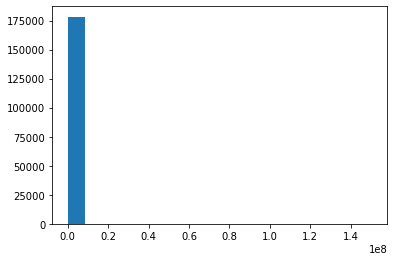

In [13]:
# histograma de Ammount
#fig, ejes = plt.subplots()
intervalos = int(round(1 + math.log(len(data_robos_completa['Ammount']), 2), 0)) # regla de struges para la cantidad de intervalos
plt.hist(data_robos_completa['Ammount'], bins = intervalos)
plt.title("Histograma Ammount")
plt.show()

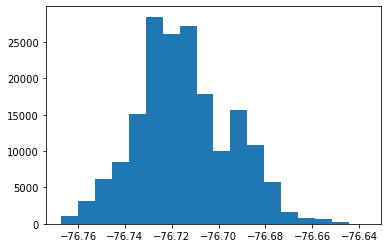

In [14]:
# histograma de LONG
#fig, ejes = plt.subplots()
intervalos = int(round(1 + math.log(len(data_robos_completa['LONG']), 2), 0)) # regla de struges para la cantidad de intervalos
plt.hist(data_robos_completa['LONG'], bins = intervalos)
plt.title("Histograma LONG")
plt.show()

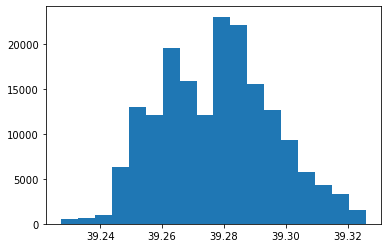

In [15]:
# histograma de LAT
#fig, ejes = plt.subplots()
intervalos = int(round(1 + math.log(len(data_robos_completa['LAT']), 2), 0)) # regla de struges para la cantidad de intervalos
plt.hist(data_robos_completa['LAT'], bins = intervalos)
plt.title("Histograma LAT")
plt.show()

Al observar los histogramas de estas variables continuas veo que tanto LONG como LAT son bastante simétricas, por lo que podrían acercarse incluso a una distribución Normal.

Por otra parte, *Ammount (el valor del bien) posee una fuerte asimetría positiva*, como suele suceder con estas variables económicas de corte transversal. Por lo que podría acecarse al comportamiento de una distribuciónm Log-Normal por ejemplo. Como usualmente muchos modelos estadísticos requieres normalidad de sus variables, voy a **aplicar logaritmo natural a la variable Ammount** para intentar que tenga una mayor simetría. Además, el logaritmo (función monótona creciente) permitirá "disminuir" la brecha entre los valores de los datos de esta variable y permitirá un mejor análisis gráfico de la misma.

In [25]:
# primero busco si hay valores cero para Ammount (esto generaría un error a la hora de calcular el logaritmo natural)
data_robos_completa.loc[data_robos_completa['Ammount'] == 0.0]

,Date,Ammount,LONG,LAT,f1,f2,Target,ln_ammount
161779,2021-06-15 10:24:41.800,0.0,-76.733175,39.244266,b,t39,0.0,-inf


In [36]:
# reemplazo este valor cero en Ammount por un valor muy muy pequeño que a fines prácticos sea aproximadamente un cero, pero que no genere problemas para el calculo del log natural
#data_robos_completa['161779', 'Ammount']
data_robos_completa['Ammount'] = data_robos_completa['Ammount'].replace(0.0,0.000001)
data_robos_completa.loc[data_robos_completa['Ammount'] == 0.0]

,Date,Ammount,LONG,LAT,f1,f2,Target,ln_ammount


In [37]:
# ahora que ya no hay valores cero que generen problemas, transformo la columna Ammount para crear la variable ln_ammount
data_robos_completa['ln_ammount'] = np.log(data_robos_completa['Ammount'])
data_robos_completa

,Date,Ammount,LONG,LAT,f1,f2,Target,ln_ammount
1,2019-01-02 01:16:06.560,7.2410,-76.734903,39.255522,g,t45,1.0,1.979759
2,2019-01-02 05:34:08.743,269.6821,-76.692228,39.295591,i,t65,1.0,5.597244
3,2019-01-02 05:37:57.293,95.6804,-76.683417,39.281629,h,t80,0.0,4.561013
4,2019-01-02 08:20:44.120,473.3587,-76.706614,39.286117,g,t45,1.0,6.159853
5,2019-01-02 08:22:29.763,437.1345,-76.707989,39.287137,g,t45,1.0,6.080241
...,...,...,...,...,...,...,...,...
179113,2021-08-17 11:01:43.160,38.6350,-76.726331,39.253485,b,t29,NaN,3.654159
179114,2021-08-17 11:02:47.660,13.6243,-76.706398,39.295899,b,t39,NaN,2.611855
179115,2021-08-17 11:06:17.607,120621.3611,-76.706428,39.295834,b,t39,NaN,11.700412
179116,2021-08-17 11:07:55.097,12.5085,-76.705835,39.289046,b,t39,NaN,2.526408


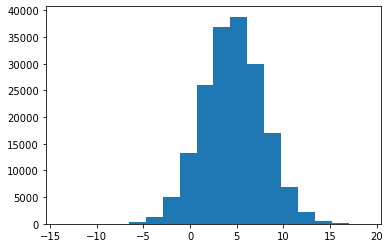

In [38]:
intervalos = int(round(1 + math.log(len(data_robos_completa['ln_ammount']), 2), 0)) # regla de struges para la cantidad de intervalos
plt.hist(data_robos_completa['ln_ammount'], bins = intervalos)
plt.title("Histograma ln(Ammount)")
plt.show()

Ahora, al graficar el histograma para la variabel ln_ammount podemos observar una distribución mucho más simétrica y con mayor normalidad, lo cuál puede ser útil para luego entrenar un modelo con esta variable.

Ahora continúo el análisis exploratorio también sobre las otras dos variables continuas.

In [45]:
# calculo media y mediana de estas variables y analizo que tanto se parecen entre si
diccionario = {'Ammount' : [ data_robos_completa['Ammount'].mean(), data_robos_completa['Ammount'].median()], 
               'ln_ammount' : [ data_robos_completa['ln_ammount'].mean(), data_robos_completa['ln_ammount'].median()], 
               'LONG' : [ data_robos_completa['LONG'].mean(), data_robos_completa['LONG'].median()],
               'LAT' : [ data_robos_completa['LAT'].mean(), data_robos_completa['LAT'].median()]}
  
# creating a Dataframe object 
df_media_mediana = pd.DataFrame(diccionario)
df_media_mediana

,Ammmount,ln_ammount,LONG,LAT
0,16701.6577,4.604339,-76.714534,39.277870
1,100.9094,4.614223,-76.716147,39.279177


La distribución Normal se caracteriza porque su media y mediana son exactamente iguales. Entonces, al poder ver esta comparación para las variables podemos obtener otro punto a favor para decir que ln_ammount, LONG y LAT son cercanas a una distribución Normal.

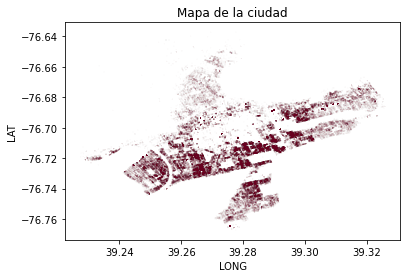

In [79]:
# gráfico de dispersión de los datos a partir de las variables LAT y LONG para entender mejor donde sucedieron los hechos
plt.scatter(data_robos_completa['LAT'], data_robos_completa['LONG'], c = data_robos_completa['Ammount'], s = 0.01, cmap = 'RdBu', alpha = 0.1)
plt.title("Mapa de la ciudad")
plt.xlabel("LONG")
plt.ylabel("LAT")
plt.show() # como son muchos datos y muy superpuestos, armo un mapa con puntos muy pequeños y de mucha transparencia para poder ver bien la forma del lugar y donde hay más puntos

Dado el mapa realizado arriba, podemos ver aspectos geográficos de la zona. E incluso se pueden percibir áreas separadas entre si, lo cuál da la idea de que se podría crear una nueva variable categórica "área" en la cual agrupe las latitudes y longitudes correspondientes, y puede que brinde la misma o mayor información (más compactada) que LONG y LAT.

Además, en este gráfico también coloreamos un gradiente según color y como podemos ver a simple vista, no se percibe que en ciertas zonas alla habido robos de mayor dinero que otras.


### Análisis sobre las variables *categóricas*

In [17]:
# variables categóricas
data_robos_completa.describe(include = ['category']) # observo que para f1 hay 9 categorias diferente, pero para f2 hay 90 categorias diferentes
# el hecho de que la variable f2 implicaría generar muchas nuevas variabbles (89) para poder codificarla como dummies si lo considero necesario

,f1,f2,Target
count,179117,179117,164117.0
unique,9,90,2.0
top,b,t39,0.0
freq,150081,85914,104730.0


In [41]:
data_robos_completa['f1'].value_counts()

b    150081
g     23573
a      3185
h      1011
d       539
e       323
i       303
c       100
f         2
Name: f1, dtype: int64

In [56]:
# data_robos_completa['f2'].value_counts() # esto no muestra toda la cantidad de categorías de mayor frecuencia que deseo ver, por eso lo veo en un dataframe
pd.DataFrame(data_robos_completa['f2'].value_counts()).head(30) # de las 90 categorias de f2, analizo el conteo de las 30 de mayor fecuencia (33,33% del total)

,f2
t39,85914
t29,22766
t63,19466
t32,14662
t1,5205
t9,5031
t15,4152
t33,3054
t37,1952
t83,1591


In [43]:
data_robos_completa['Target'].value_counts()

0.0    104730
1.0     59387
Name: Target, dtype: int64